# ResNet tech Blog by Mahesh Bhume

In this notebook I will be discussing one of deep learning architecture known as ResNet, this blog covers from motivation behind ResNet, internal architecture of this network, how it works to practical implementation of resnet architecture from scratch. Note(The error is seen in code phase because I've interpreted the kernel after couple of successful run and it perfectly fine)

# **ResNet - Deep Residual Learning for Image Recognition**

Over a decade, there have been a series of continuous yet innovative advancements in deep learning architectures and computer vision have been achieved. Particularly, with convolutional neural networks, we are getting highest level of results on problems such as image classification and image recognition. 
So as a result of that, general approach has been believed to make deeper neural networks (adding more layers) to solve image recognition and classification tasks. But that has raised two main hurdles, one is vanishing gradient and degradation problem in neural networks. That’s where ResNet comes into rescue and helps solve these problem, especially degradation with the help of residual blocks/ skip connections

ResNet, short for Residual Network, it was introduced in 2015 by Kaiming He, Xiangyu Zhang, Shaoqing Ren and Jian Sun in their paper “Deep Residual Learning for Image Recognition”. 

The ResNet model were extremely successful as,it can efficiently train networks with 18,34,50,100 and 150 layers. It won 1st place in the ILSVRC 2015 classification competition with a top-5 error rate of 3.57% (An ensemble model) and 1st place in ILSVRC and COCO 2015 competition in ImageNet Detection, ImageNet localization, Coco detection and Coco segmentation.

# Motivation behind ResNet 

Deep learning is thought of as learning a hierarchical set of representation such that it learns low mid and high level features in images this is analogous to learning like edges/ shapes and objects, so theoretically more layers should enrich the levels of the features and previous model to ResNet typically have depths of 16 and 30 layers, so idea is that shouldn’t  building better neural networks easy as adding more layers.  There are two major problem in making deep neural network deep: vanishing gradient and degradation. 
Vanishing /exploding gradient problem: - “Vanishing gradient is the phenomenon that with the increase of the neural network layers, the gradient become too small to allow network evolve”. This problem is largely addressed by renormalisation and ReLU activation function. Neural network uses an algorithm called BackPropagation to update the weights of the network, what BackPropagation does is, it first calculates the gradients from the error using the chain rule, then it updates the weights. 
Since the BackPropagation starts from the output layer to all the way back to input layer, while using chain rule the repeated multiplications make the weights extremely small while reaching to the earlier layers,  so in a simple neural network we may not face problems with updating weights but in a deep neural network we face issues.

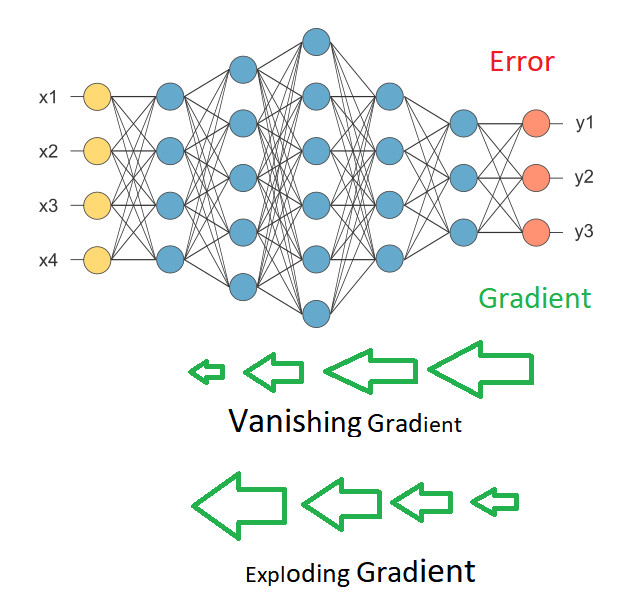
 

 Here is a plot that describes error on training and testing data for a 20-layer Network and 56 layers Network.
 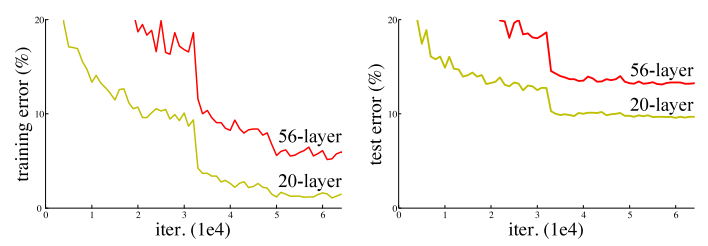

We can see that error for 56-layer is more than a 20-layer network in both cases of training data as well as testing data. 
This suggests that with adding more layers on top of a network, its performance degrades. This could be blamed on the optimization function, initialization of the network and more importantly vanishing gradient problem. 
You might be thinking that it could be a result of overfitting too, but here the error of the 56-layer network is worst on both training as well as testing data which does not happen when the model is overfitting.

In contrast what happens with ResNet is that it copies previous layers output to next layer,  this really help with the vanishing and exploding gradient problems and allows you to train much deeper networks without any appreciable lose in performance, so ResNet is certainly effective with training deep network.
So first contribution of ResNet is showing that if you just continue to concatenate convolutional layers on top of activations and batch normalization the training will eventually get worse not better.
This paper has offered major construction insight I.e. residual blocks/skip connections/ identity mapping, if you consider a shallow architecture and it’s deeper counterpart with more layers theoretically all the deeper model would need to do is to just copy the output from the model with identity mappings, so that a deeper model should produce no higher error than the shallow counterpart.

# **Residual Blocks in ResNet**
To build ResNet model, this paper has come up brilliant idea to use skip connections to turn each of these into residual block. The core idea of residual block is introducing identity shortcut connection, which is to add the original input to the output of convolution block this is called skip connection. 

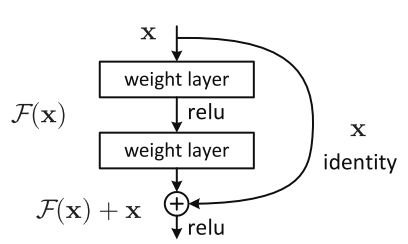

The above picture represents a residual block, which can be represented as
                   output =  F(x) + x
where x is input to the ResNet block and output from the previous layer.
F(x) can be a small neural network consisting of multiple convolution blocks.

When we reach at F(X) + X, ResNet propose to input previous X to the output of F(X)+X, as when we reach this stage because of derivatives values will be getting minute/loss, so when we add identity X, the value would get high and it will know about previous state, this is simple residual block concept.

Why is it difficult to learn identity function
“Without skip connections, the weights and bias values have to be modified so that it will correspond to identity function. It is very difficult to learn identity function from the scratch, exacerbated by the non-linearity in the layers and results in the degradation problem.”

So How ResNet solves the difficulties to learn identity function
Let g(x) be the function learned by the layers. 
                            h(x) = g(x)+x 
Here +x term denotes the skip connection.
In h(x)=g(x)+x, the +x term will bring the original value, layer g(x) has to learn just the changes in the value, or the residue or delta x. 

Whatever being learned in g(x) is just the residue, either positive or negative to modify x to required value.
For h(x) to be identity function, the residue g(x) just has to become zero function, which is very easy to learn, i.e. set all weights to zero. 
Then h(x) = 0+x = x, which is the required identity function. This will help overcome the degradation problem.

# **ResNet architecture ** 

Most of the variants of ResNet consist of 
1. A convolution block (Conv -> BN -> ReLU -> MaxPool)
2.  ResLayer – 1 
3. ResLayer – 2 
4. ResLayer – 3 
5. ResLayer – 4
6. A classifier block with average Pooling and a Linear Layer

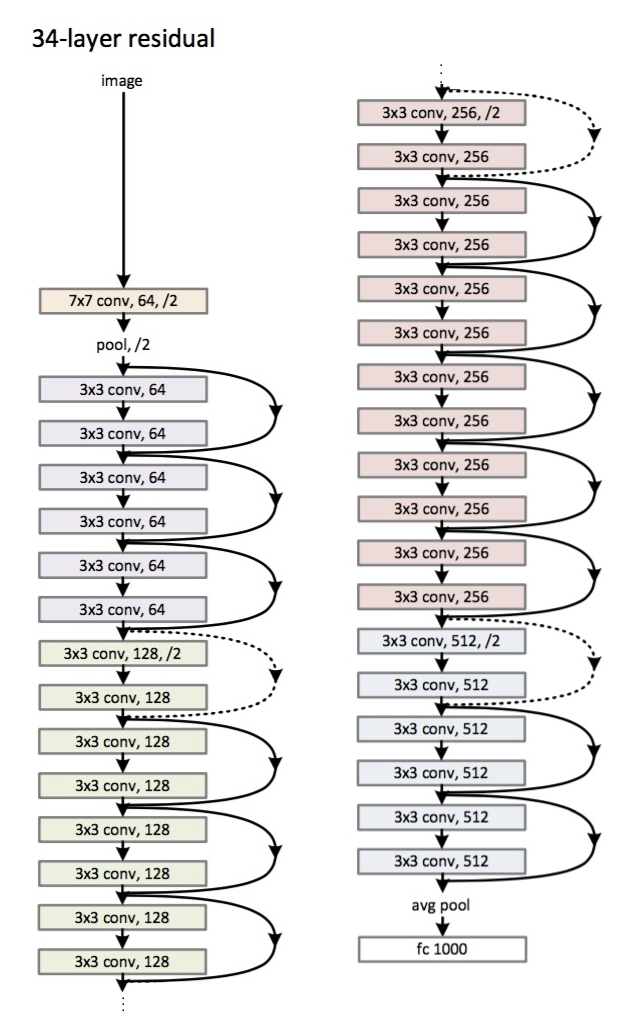

ResNet network uses a 34-layer plain network architecture inspired by VGG-19 in which then the shortcut connection is added. These shortcut connections then convert the architecture into the residual network as shown in the figure below:
The first layer in ResNet: convolution + batch normalization + max pooling 
standard has been set in ResNet architecture as 

Filter size = 7*7 and 64 such feature map

stride = 2 and padding = 3

Suppose our input image size is 300 * 300 *3, then by using following formula the output size would be 150 *150 *64

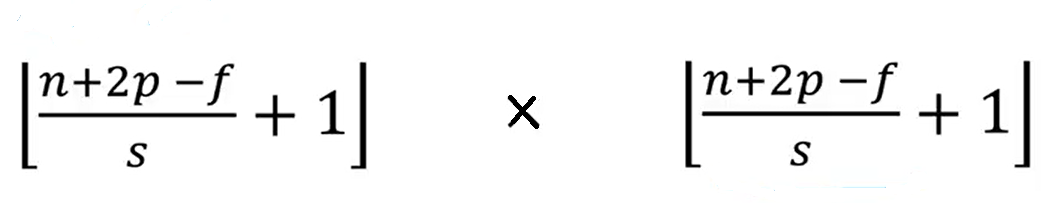

The second layer is (3*3) max pooling with stride 2 and padding 1
Now our image size has reduced to 15*150*64 and after applying above formula we would get 75*75*64 is output the output of pooling layer 
In ResNet we have 2 type of blocks 
1st is identity block where input size == output size then we don’t need to add convolution block, as the dimensions would be same, this is represented in dark line in figure.

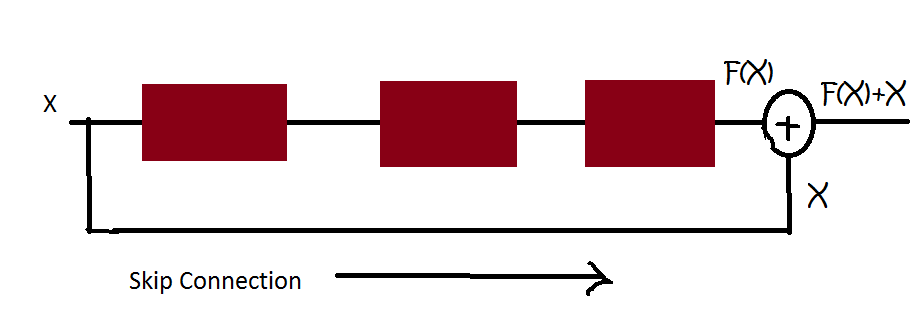

2nd convolution block where input size! = output size, in this we add one more layer, its job is to make input value size similar to the output, so that we can add identity X to the output, this block is represented in dotted lines in figure.

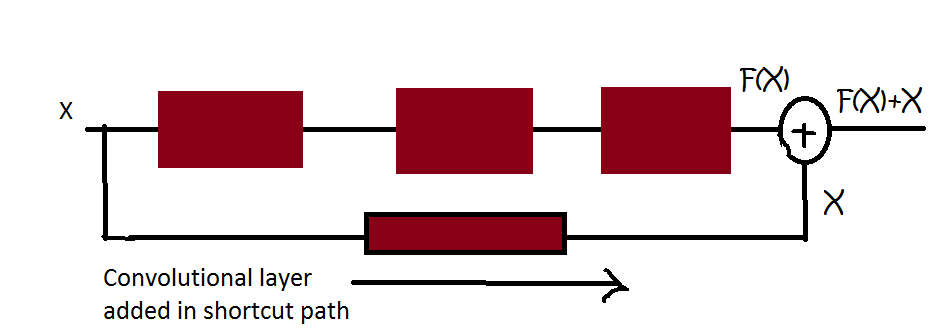

There are 2 options for matching the output size in convolution block:
1.Padding the input volume
2.perform 1*1 convolution
Since now the addition operation cannot be performed as the dimensions has changed, so we need to apply down sampling strategy. By using figure 2 formula with padding set to zero and 1*1 filter size, the output dimension would get similar. 

# **Comparing VGG-19 to 34 layer ResNet**
This paper has set lot of standard for modern deep learning as instead of pooling they do a stride to convolution which also become more standard than doing max or average pooling to downscale. As we can see we loose performance when you simply up the number of layers but then when you introduce the residual connections, there is always this jump in connection, along these connections the singles can travel as the identity function. The only caveat here in order to build the residual connection the output has to be of the same size as input because you need to add input to the output, the 1*1 convolutions will simply up that projected 64 filters to 128 filters, here they have given 3 options 1st is zero padding 2nd is 1*1 convolution and 3rd options is all of these connections also have 1*1 convolution, which introduces extra parameters and they realize option 3rd isn’t improving over option 2nd substantially, so ultimently they went with option 2nd and what the world does right now.
This paper also solved age-old discussion, when to use batch normalization before the activation or after the activation.

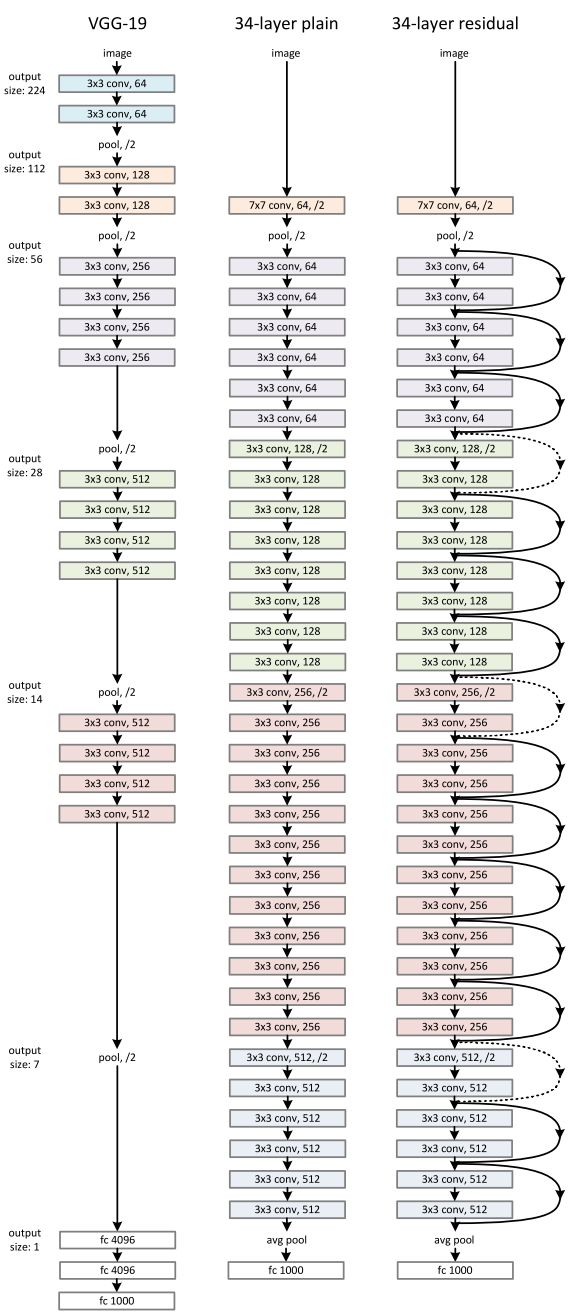

For ResNet implementation in PyTorch we will be following standared ResNet 50 architecture.
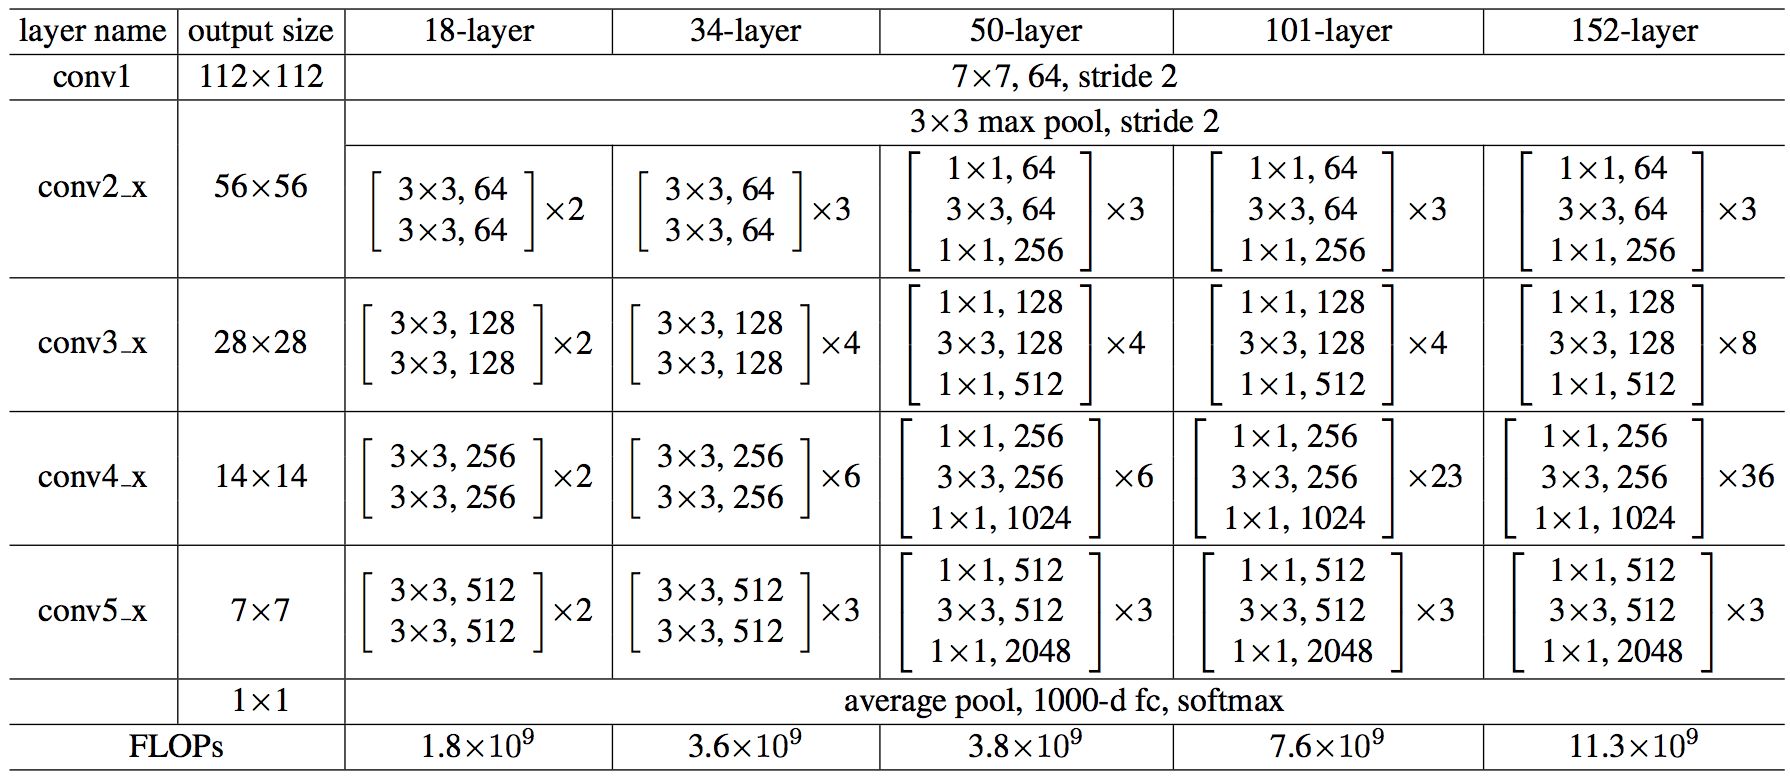

In [ ]:
## ResNet implementation with PyTorch
# # Code taken & adjusted from: https://github.com/pytorch/vision/blob/master/torchvision/models/resnet.py

#Load
import torch 
import numpy as np 
import torchvision.transforms as transforms 
import torchvision 
import torch.nn.functional as F

# The Basic Block is a building block of ResNet layers 1,2,3,4. 
# Each ResNet layer will contain multiple residual blocks. 
# Each Basic block does the following – apply a bunch of convolution blocks(mostly 2) and add the output straight to the input. 
# Orif there is a size mismatch between input and output, downsample the input before adding it to the output.
class baseBlock(torch.nn.Module):
    expansion = 1
    def __init__(self,input_planes,planes,stride=1,dim_change=None):
        super(baseBlock,self).__init__()
        #declare convolutional layers with batch norms
        self.conv1 = torch.nn.Conv2d(input_planes,planes,stride=stride,kernel_size=3,padding=1)
        self.bn1   = torch.nn.BatchNorm2d(planes)
        self.conv2 = torch.nn.Conv2d(planes,planes,stride=1,kernel_size=3,padding=1)
        self.bn2   = torch.nn.BatchNorm2d(planes)
        self.dim_change = dim_change
    def forward(self,x):
        #Save the residue
        res = x
        output = F.relu(self.bn1(self.conv1(x)))
        output = self.bn2(self.conv2(output))

        if self.dim_change is not None:
            res = self.dim_change(res)
        
        output += res
        output = F.relu(output)

        return output

class bottleNeck(torch.nn.Module):
    expansion = 4
    def __init__(self,input_planes,planes,stride=1,dim_change=None):
        super(bottleNeck,self).__init__()

        self.conv1 = torch.nn.Conv2d(input_planes,planes,kernel_size=1,stride=1)
        self.bn1 = torch.nn.BatchNorm2d(planes)
        self.conv2 = torch.nn.Conv2d(planes,planes,kernel_size=3,stride=stride,padding=1)
        self.bn2 = torch.nn.BatchNorm2d(planes)
        self.conv3 = torch.nn.Conv2d(planes,planes*self.expansion,kernel_size=1)
        self.bn3 = torch.nn.BatchNorm2d(planes*self.expansion)
        self.dim_change = dim_change
    
    def forward(self,x):
        res = x
        
        output = F.relu(self.bn1(self.conv1(x)))
        output = F.relu(self.bn2(self.conv2(output)))
        output = self.bn3(self.conv3(output))

        if self.dim_change is not None:
            res = self.dim_change(res)
        
        output += res
        output = F.relu(output)
        return output

        
# ResNet Layers 
# Each ResNet layer is built using multiple residual blocks. _make_layer function is responsible for building a resnet layer. 
# The 1st resnet layer is created with 3 residual blocks with 3X3 convolution and stride 1 (No downsampling is required.)
# Starting from 2nd resnet layers, only the first convolution layer of the first block has stride 2, the rest of all the convolution layers are of stride 1. 
# And also for downsampling input, stride 2 convolution is applied. Layers 2, 3, and 4 have 4, 6, and 3 residual blocks respectively.

class ResNet(torch.nn.Module):
    def __init__(self,block,num_layers,classes=10):
        super(ResNet,self).__init__()
        #according to research paper:
        self.input_planes = 64
        self.conv1 = torch.nn.Conv2d(3,64,kernel_size=3,stride=1,padding=1)
        self.bn1   = torch.nn.BatchNorm2d(64)
        self.layer1 = self._layer(block,64,num_layers[0],stride=1)
        self.layer2 = self._layer(block,128,num_layers[1],stride=2)
        self.layer3 = self._layer(block,256,num_layers[2],stride=2)
        self.layer4 = self._layer(block,512,num_layers[3],stride=2)
        self.averagePool = torch.nn.AvgPool2d(kernel_size=4,stride=1)
        self.fc    =  torch.nn.Linear(512*block.expansion,classes)
    
    def _layer(self,block,planes,num_layers,stride=1):
        dim_change = None
        if stride!=1 or planes != self.input_planes*block.expansion:
            dim_change = torch.nn.Sequential(torch.nn.Conv2d(self.input_planes,planes*block.expansion,kernel_size=1,stride=stride),
                                             torch.nn.BatchNorm2d(planes*block.expansion))
        netLayers =[]
        netLayers.append(block(self.input_planes,planes,stride=stride,dim_change=dim_change))
        self.input_planes = planes * block.expansion
        for i in range(1,num_layers):
            netLayers.append(block(self.input_planes,planes))
            self.input_planes = planes * block.expansion
        
        return torch.nn.Sequential(*netLayers)

    def forward(self,x):
        x = F.relu(self.bn1(self.conv1(x)))

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = F.avg_pool2d(x,4)
        x = x.view(x.size(0),-1)
        x = self.fc(x)

        return x

KeyboardInterrupt: ignored

In [ ]:
from resnet import ResNet , bottleNeck , baseBlock
import torchvision.transforms as transforms 
import torchvision 
import torch

def test():
        #To convert data from PIL to tensor
    transform = transforms.Compose(
        [transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
        )

    #Load train and test set:
    train = torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)
    trainset = torch.utils.data.DataLoader(train,batch_size=128,shuffle=True)

    test = torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transform)
    testset = torch.utils.data.DataLoader(test,batch_size=128,shuffle=False)
    
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(device)

# To create different variants of ResNets, we just need to pass the type of block and number of residual blocks to be stacked together to Resnet Class

    #ResNet-18 
    #net = ResNet(baseBlock,[2,2,2,2],10)

    #ResNet-50
    net =  ResNet(bottleNeck,[3,4,6,3])
    net.to(device)
    costFunc = torch.nn.CrossEntropyLoss()
    optimizer =  torch.optim.SGD(net.parameters(),lr=0.02,momentum=0.9)

    for epoch in range(100):
        closs = 0
        for i,batch in enumerate(trainset,0):
            data,output = batch
            data,output = data.to(device),output.to(device)
            prediction = net(data)
            loss = costFunc(prediction,output)
            closs = loss.item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            #print every 1000th time
            if i%100 == 0:
                print('[%d  %d] loss: %.4f'% (epoch+1,i+1,closs/1000))
                closs = 0
        correctHits=0
        total=0
        for batches in testset:
            data,output = batches
            data,output = data.to(device),output.to(device)
            prediction = net(data)
            _,prediction = torch.max(prediction.data,1)  #returns max as well as its index
            total += output.size(0)
            correctHits += (prediction==output).sum().item()
        print('Accuracy on epoch ',epoch+1,'= ',str((correctHits/total)*100))

    correctHits=0
    total=0
    for batches in testset:
        data,output = batches
        data,output = data.to(device),output.to(device)
        prediction = net(data)
        _,prediction = torch.max(prediction.data,1)  #returns max as well as its index
        total += output.size(0)
        correctHits += (prediction==output).sum().item()
    print('Accuracy = '+str((correctHits/total)*100))

if __name__ == '__main__':
    test()